In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing UNO files

In [10]:
inv_df = pd.read_excel("../UNO_inventory_item.xlsx")
sale_df = pd.read_excel("../UNO_Sale_vs_RCVD.xlsx")

In [13]:
inv_df.head()

,STYLE#,COLOR,Description,LAST RCVD,Qty,On-Hand,CB Reason,ToWH
0,DTA1A9500,IV,SEED BEAD ANKLET,2016-04-12,-144.0,0.0,NaN,NaN
1,DTA1A9500,IV,SEED BEAD ANKLET,2016-04-12,144.0,0.0,NaN,NaN
2,DTA1A9500,MUL,SEED BEAD ANKLET,2016-04-12,-144.0,0.0,NaN,NaN
3,DTA1A9500,MUL,SEED BEAD ANKLET,2016-04-12,144.0,0.0,NaN,NaN
4,DTA1A9500,TQ,SEED BEAD ANKLET,2016-04-12,-144.0,0.0,NaN,NaN


In [30]:
def format_header(df):
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(" ","_")
    return df

In [33]:
sale_df = format_header(sale_df)
inv_df = format_header(inv_df)

### Create 2 tables to see if sale qty matches neg inv

In [58]:
sale_item_qty = sale_df.groupby(["style#","color"]).agg({"qty":"sum"}).reset_index()
sale_item_qty["unique_id"] = sale_item_qty["style#"] + "-" + sale_item_qty["color"]
sale_item_qty

,style#,color,qty,unique_id
0,DTA07061310BL,RG,354,DTA07061310BL-RG
1,DTA07061326NK,RG,249,DTA07061326NK-RG
2,DTA07061447NK,RG,249,DTA07061447NK-RG
3,DTA1610@1797@1,BWG,1497,DTA1610@1797@1-BWG
4,DTA165@433@7A,GD,120,DTA165@433@7A-GD
5,DTA165@433@7A,GOLD,141,DTA165@433@7A-GOLD
6,DTA165@433@7A,RG,120,DTA165@433@7A-RG
7,DTA169@1520,ROSEGOLD,2229,DTA169@1520-ROSEGOLD
8,DTA17,CHAM,120,DTA17-CHAM
9,DTA17,HEM,120,DTA17-HEM


In [68]:
neg_inv = inv_df[inv_df.loc[:,"qty"]<0]
neg_inv = neg_inv[["style#", "color", "qty"]]
neg_inv = neg_inv.groupby(["style#", "color"]).agg({"qty":"sum"}).reset_index()
neg_inv["unique_id"] = neg_inv["style#"].map(str) + "-" + neg_inv["color"].map(str)
neg_inv

,style#,color,qty,unique_id
0,DTA1A9500,IV,-144.0,DTA1A9500-IV
1,DTA1A9500,MUL,-144.0,DTA1A9500-MUL
2,DTA1A9500,TQ,-144.0,DTA1A9500-TQ
3,DTA1B2029,WG-COR,-372.0,DTA1B2029-WG-COR
4,DTA1B2029,WG-CRM,-492.0,DTA1B2029-WG-CRM
5,DTA1B2029,WG-GRY,-252.0,DTA1B2029-WG-GRY
6,DTA1B2029,WG-IV,-570.0,DTA1B2029-WG-IV
7,DTA1B2029,WG-JET,-492.0,DTA1B2029-WG-JET
8,DTA1B2029,WG-LBR,-516.0,DTA1B2029-WG-LBR
9,DTA1B2029,WG-MST,-240.0,DTA1B2029-WG-MST


In [76]:
#x is sales, and y is inventory
merged_df = pd.merge(sale_item_qty, neg_inv, how = "inner", on = "unique_id")
merged_df["sum_qty"] = merged_df["qty_x"] + merged_df["qty_y"]
merged_df

,style#_x,color_x,qty_x,unique_id,style#_y,color_y,qty_y,sum_qty
0,DTA1A9500,IV,144,DTA1A9500-IV,DTA1A9500,IV,-144.0,0.0
1,DTA1A9500,MUL,144,DTA1A9500-MUL,DTA1A9500,MUL,-144.0,0.0
2,DTA1A9500,TQ,144,DTA1A9500-TQ,DTA1A9500,TQ,-144.0,0.0
3,DTA1B2029,WG-COR,312,DTA1B2029-WG-COR,DTA1B2029,WG-COR,-372.0,-60.0
4,DTA1B2029,WG-CRM,336,DTA1B2029-WG-CRM,DTA1B2029,WG-CRM,-492.0,-156.0
5,DTA1B2029,WG-GRY,192,DTA1B2029-WG-GRY,DTA1B2029,WG-GRY,-252.0,-60.0
6,DTA1B2029,WG-IV,463,DTA1B2029-WG-IV,DTA1B2029,WG-IV,-570.0,-107.0
7,DTA1B2029,WG-JET,336,DTA1B2029-WG-JET,DTA1B2029,WG-JET,-492.0,-156.0
8,DTA1B2029,WG-LBR,444,DTA1B2029-WG-LBR,DTA1B2029,WG-LBR,-516.0,-72.0
9,DTA1B2029,WG-MST,156,DTA1B2029-WG-MST,DTA1B2029,WG-MST,-240.0,-84.0


### Importing Pkl file

In [41]:
df = pd.read_pickle("../Bird/sales_latest_update.pkl")

In [42]:
df.head()

,STYLE#,COLOR,DESCRIPTION,CUST #,INVC DATE,QTY,UNIT PRICE,EXT-AMT,REASON,IMPORT HANDMADE,...,LAST INVOICED,FIRST INVOICED,Categories,Categories1,Attribute,material_style,year,month,Style_Color,Revenue
0,DTA1A9500,IV,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,...,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500IV,576.0
1,DTA1A9500,MUL,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,...,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500MUL,576.0
2,DTA1A9500,TQ,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,...,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500TQ,576.0
3,DTA1B2029,WG-COR,row wood bead stretch br,CHE005,2016-05-20,12,3.25,$ 39.00,NaN,IMPORT,...,10/3/18,4/4/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,5,DTA1B2029WG-COR,39.0
4,DTA1B2029,WG-COR,row wood bead stretch br,GMA01,2016-08-22,24,3.25,$ 78.00,NaN,IMPORT,...,10/3/18,4/4/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,8,DTA1B2029WG-COR,78.0


### Modeling

### KMeans Clustering

#### Elbow Plot

In [50]:
#Excluding outliers and qty < 0
df = df.loc[(df["UNIT PRICE"]<40) & (df["QTY"]>0),:]

Text(0.5,1,'Elbow curve')

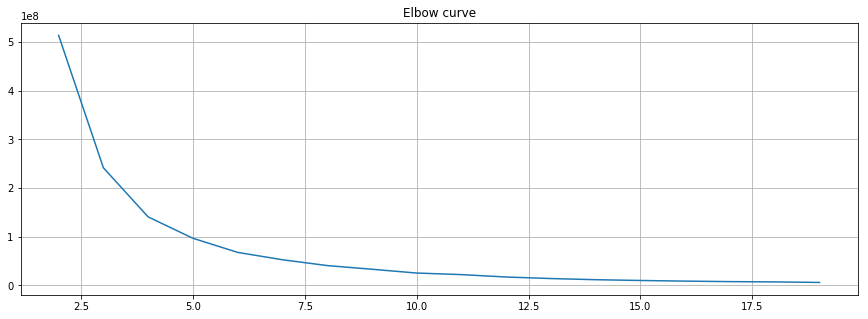

In [55]:
from sklearn.cluster import KMeans as kmeans

qty_price = df.loc[:,["UNIT PRICE", "QTY"]]
X = qty_price["UNIT PRICE"]
y = qty_price["QTY"]

distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(qty_price)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')


#### Visualizing Clusters

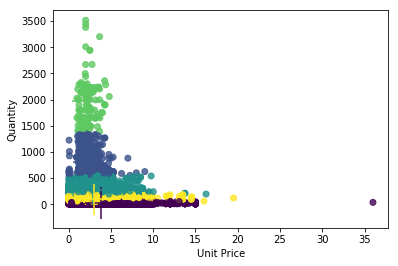

In [52]:
#instantiating model
km = kmeans(n_clusters=5)
km.fit(qty_price)

#creating labels
labels = km.labels_

#centroids
center = km.cluster_centers_

#visualizing labels
plt.scatter(X, y, c=labels, alpha=0.8)
plt.scatter(center[:, 0], center[:, 1], c=[0, 1, 2, 3, 4], marker='+', s=1000)
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.show()

In [103]:
#Adding cluster column in df
df1 = df.loc[:,["QTY","UNIT PRICE"]]
df1["CLUSTER"] = labels
df1["CLUSTER"] = df1["CLUSTER"].map(str)

In [110]:
df1.CLUSTER.dtype

dtype('O')

In [104]:
from sklearn import tree
from sklearn.model_selection import train_test_split

X = df1.loc[:,["UNIT PRICE","CLUSTER"]]
y = df1.loc[:,"QTY"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = tree.DecisionTreeRegressor()
clf.fit(X_train,y_train)
predicted_test = clf.predict(X_test)
predicted_test

array([19.51004016, 18.04652997, 19.5781893 , ..., 20.66587893,
       19.5781893 , 22.26865672])

In [105]:
clf.score(X_test,y_test)

0.9195919492667395

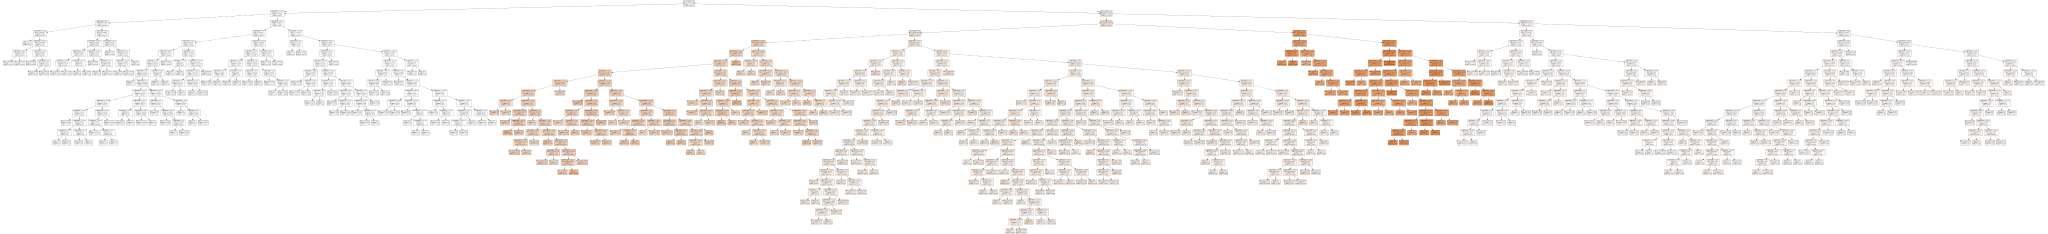

In [106]:
from sklearn.tree import export_graphviz
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(export_graphviz(clf, out_file=None
   , feature_names=X.columns, class_names=y.name
   , filled = True))

display(SVG(graph.pipe(format='svg')))
